<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Test_Stitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
image_set_dir = "C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\"
image_set_prefix = 'Test_Neuron1'

os.chdir(image_set_dir)

tif_list=list()
for dir,root,files in os.walk(image_set_dir):
    for f in files:
        if 'CH4.tif' in f:
            tif_list.append(os.path.join(dir,f))


In [4]:
pd_dict = {'file_loc': [t for t in tif_list],
           'xy': [t.split("_")[-3] for t in tif_list],
           'z': [t.split("_")[-2] for t in tif_list]}
image_df = pd.DataFrame(pd_dict)

display(image_df)


,file_loc,xy,z
0,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z001
1,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z002
2,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z003
3,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z004
4,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z005
...,...,...,...
2845,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z110
2846,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z111
2847,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z112
2848,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z113


In [5]:
z_planes = sorted(list(set(image_df['z'])))
print(z_planes)

for cur_z in [z_planes[15]]:
    single_plane_images = image_df['file_loc'][[cur_z in z for z in image_df['z']]].values


['Z001', 'Z002', 'Z003', 'Z004', 'Z005', 'Z006', 'Z007', 'Z008', 'Z009', 'Z010', 'Z011', 'Z012', 'Z013', 'Z014', 'Z015', 'Z016', 'Z017', 'Z018', 'Z019', 'Z020', 'Z021', 'Z022', 'Z023', 'Z024', 'Z025', 'Z026', 'Z027', 'Z028', 'Z029', 'Z030', 'Z031', 'Z032', 'Z033', 'Z034', 'Z035', 'Z036', 'Z037', 'Z038', 'Z039', 'Z040', 'Z041', 'Z042', 'Z043', 'Z044', 'Z045', 'Z046', 'Z047', 'Z048', 'Z049', 'Z050', 'Z051', 'Z052', 'Z053', 'Z054', 'Z055', 'Z056', 'Z057', 'Z058', 'Z059', 'Z060', 'Z061', 'Z062', 'Z063', 'Z064', 'Z065', 'Z066', 'Z067', 'Z068', 'Z069', 'Z070', 'Z071', 'Z072', 'Z073', 'Z074', 'Z075', 'Z076', 'Z077', 'Z078', 'Z079', 'Z080', 'Z081', 'Z082', 'Z083', 'Z084', 'Z085', 'Z086', 'Z087', 'Z088', 'Z089', 'Z090', 'Z091', 'Z092', 'Z093', 'Z094', 'Z095', 'Z096', 'Z097', 'Z098', 'Z099', 'Z100', 'Z101', 'Z102', 'Z103', 'Z104', 'Z105', 'Z106', 'Z107', 'Z108', 'Z109', 'Z110', 'Z111', 'Z112', 'Z113', 'Z114']


In [6]:
!pip install opencv-python
import cv2

In [7]:


image_data_list = list()
for path in single_plane_images:
    image_data =cv2.imread(path)
    image_data_list.append(image_data)
order = np.array(list(range(0,5,1)) + list(range(9,4,-1)) + list(range(10,15,1)) + list(range(19,14,-1)) + list(range(20,25,1)))
order
image_data_list_sorted = [image_data_list[o] for o in order]

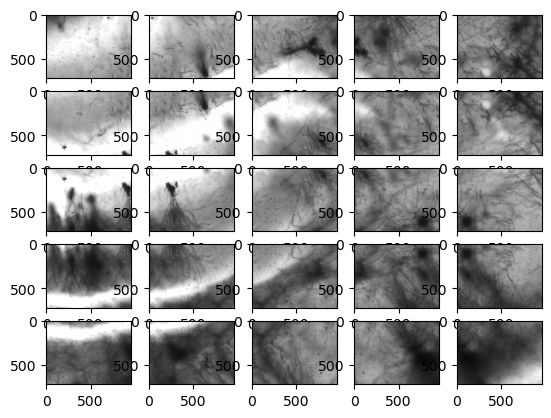

In [8]:
fig,ax=plt.subplots(5,5)
ax = ax.flatten()
image_data_list_sorted = [image_data_list[o] for o in order]
for i,f in enumerate(image_data_list_sorted):
    ax[i].imshow(f)


In [36]:
stitcher = cv2.Stitcher_create(mode=1, confidence_threshold=0.01)


TypeError: Stitcher_create() takes at most 1 keyword argument (2 given)

In [ ]:
def stitch_wrap_fast(imgs):
    cv2.Stitcher_create(mode=1)
    (status, stitched) = stitcher.stitch(imgs)
    return stitched



def iterate_leveled_stitch(imgs):
    stitch_list=list()
    for current_im, next_im in zip(imgs[:-1], imgs[1:]):
        stitched = stitch_wrap_fast([current_im,next_im])
        if stitched is not None:
            stitch_list.append(stitch_list)
        else:
            stitch_list.append(current_im)
    return stitch_list


stitch_list = iterate_leveled_stitch(image_data_list_sorted)
for img in stitch_list:
    plt.imshow(img)
    plt.show()

In [ ]:
def stitch_wrap(imgs):
    vert = False
    cv2.Stitcher_create('mode':1)
    (status, stitched) = stitcher.stitch(imgs)
    fig,ax=plt.subplots()
    if status==0:
        ax.imshow(stitched)
        print(stitched.shape)
        vert =  np.shape(stitched)[0] /  np.shape(stitched)[1]   >1
        print(vert)
    if vert: fig,ax=plt.subplots(len(imgs),1)
    else: fig,ax=plt.subplots(1, len(imgs))
    for i,im in enumerate(imgs):
        ax[i].imshow(im)
    plt.show()

pair1 = [image_data_list_sorted[0], image_data_list_sorted[5]]

for current_im, next_im in zip(image_data_list_sorted[:-1], image_data_list_sorted[1:]):
    stitch_wrap([current_im,next_im])

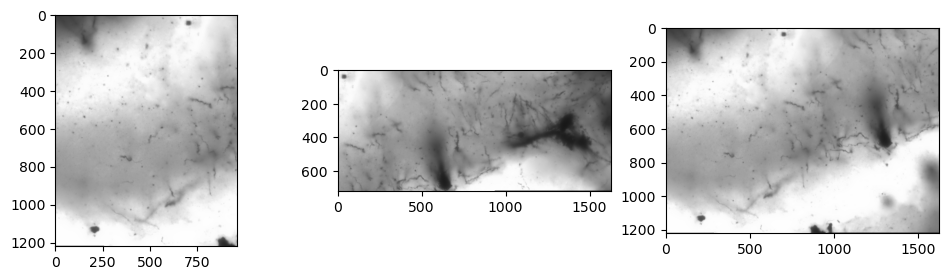

In [31]:
pair1 = [image_data_list_sorted[0], image_data_list_sorted[5]]
(status, stitched1) = stitcher.stitch(pair1)

pair2 = [image_data_list_sorted[1], image_data_list_sorted[2]]
(status, stitched2) = stitcher.stitch(pair2)

quad = [image_data_list_sorted[0], image_data_list_sorted[5], image_data_list_sorted[1], image_data_list_sorted[6]]
(status, stitched4) = stitcher.stitch(quad)

fig,ax=plt.subplots(1,3,figsize=(12,3))
ax[0].imshow(stitched1)
ax[1].imshow(stitched2)
ax[2].imshow(stitched4)

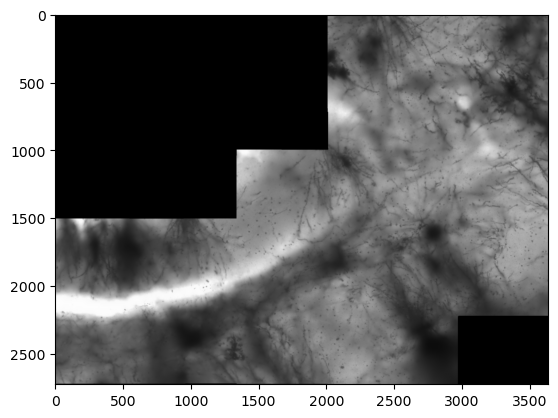

In [15]:
(status, stitched_full) = stitcher.stitch(image_data_list_sorted)
plt.imshow(stitched_full)

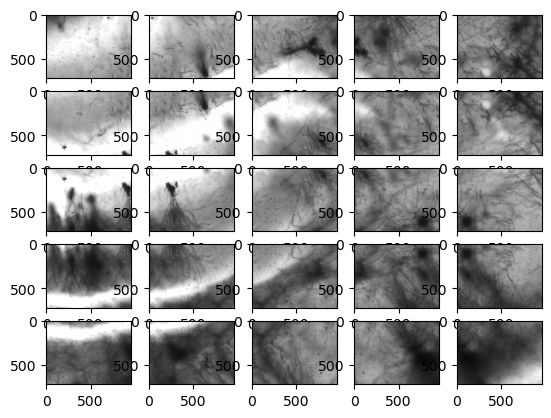

In [16]:
fig,ax=plt.subplots(5,5)
ax = ax.flatten()
image_data_list_sorted = [image_data_list[o] for o in order]
for i,f in enumerate(image_data_list_sorted):
    ax[i].imshow(f)